In [4]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from NN import Net
%matplotlib inline

In [5]:
x = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
y = x*x*x - 0.3*x + 9*x*x + torch.randn(100, 1)
x = Variable(x)
y = Variable(y)

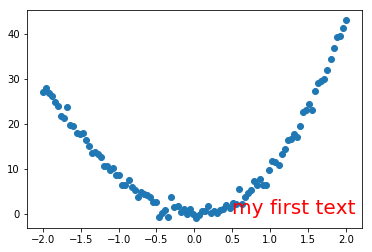

In [6]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.text(0.5, 0, 'my first text', fontdict={'size': 20, 'color':  'red'})

In [66]:
net = Net(1, 10, 1)
print(net)

Net (
  (hidden): Linear (1 -> 10)
  (output): Linear (10 -> 1)
)


In [67]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

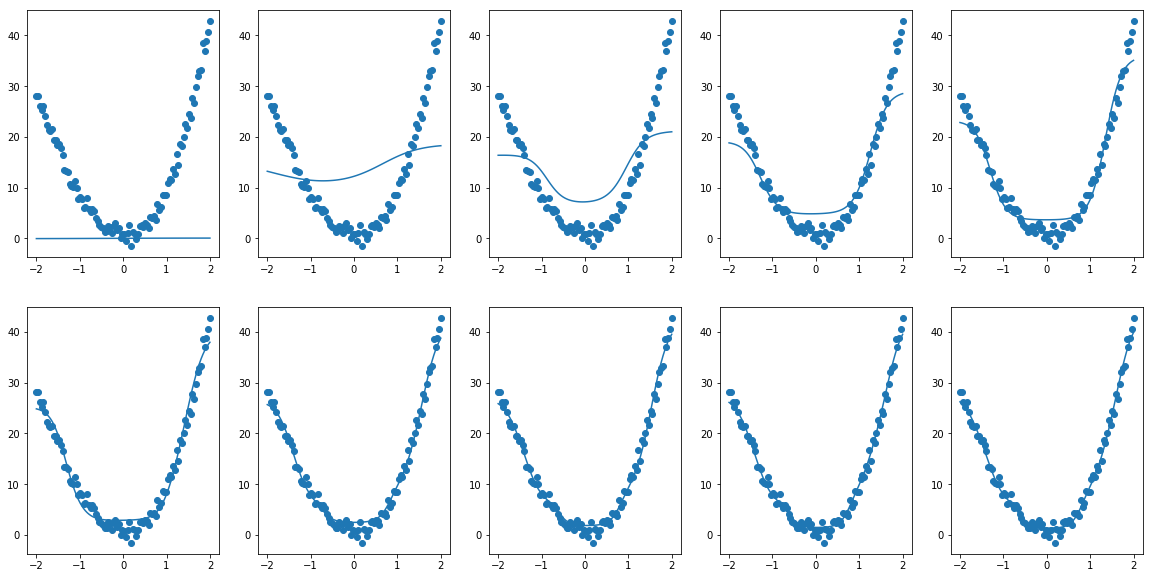

In [68]:
plt.figure(figsize=(20,10))
loss_history = []
for iter_num in xrange(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())
    
    if iter_num%10 == 0:
        plt.subplot(2,5,iter_num/10+1)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy())
        
plt.ioff()
plt.show()

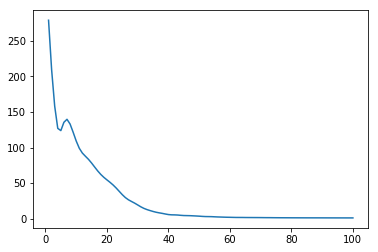

In [69]:
plt.plot(range(1, len(loss_history)+1), loss_history)